In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

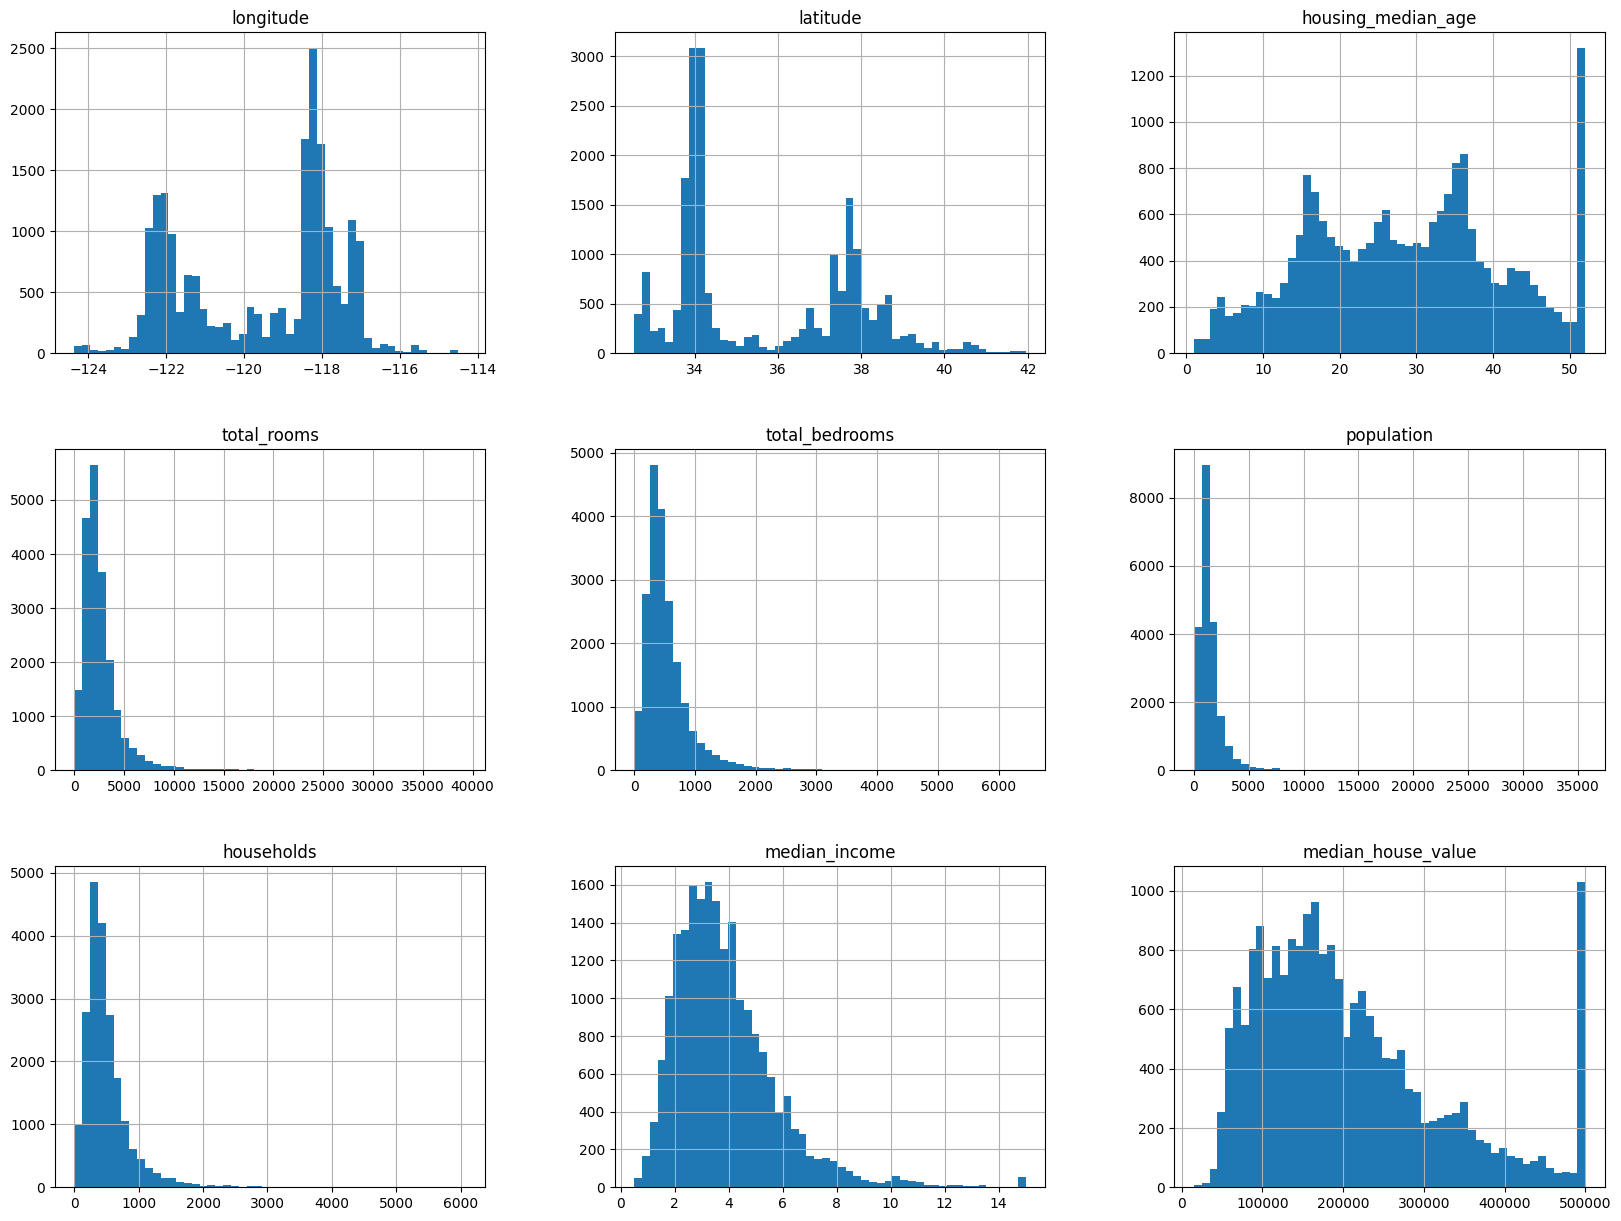

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
df_train, df_test = split_train_test(housing,0.2)
print(len(df_train), len(df_test))

16512 4128


In [12]:
from zlib import crc32


def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]    

In [13]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index") 

In [14]:
print(len(train_set),len(test_set))

16512 4128


In [15]:
# utilizando sklearn
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size= 0.2,random_state=42)

In [16]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

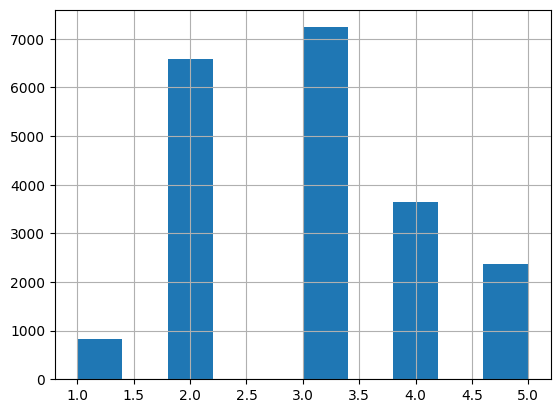

In [17]:
housing['income_cat'].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [22]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

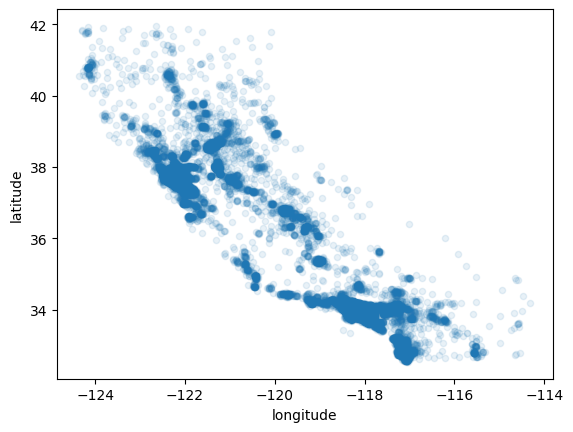

In [23]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

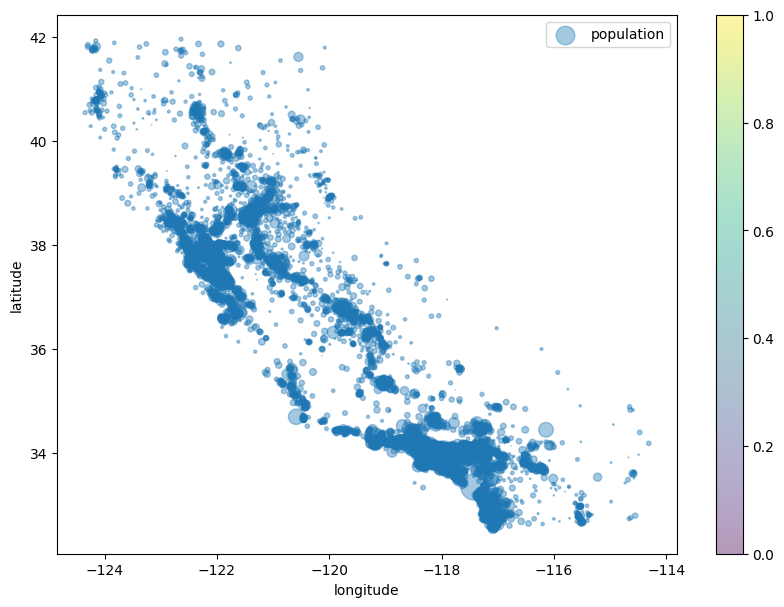

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population", figsize=(10,7),cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)


In [25]:
housing["median_house_value"]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

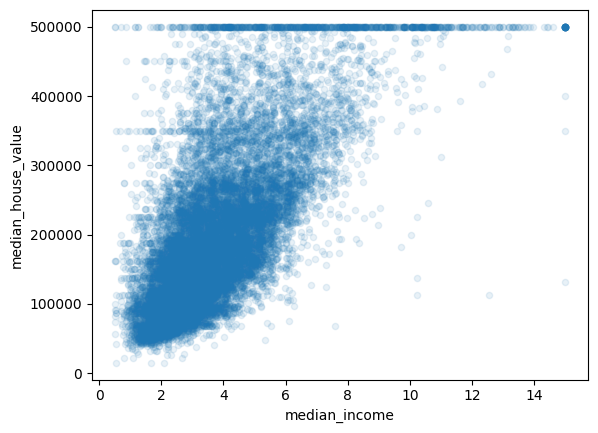

In [28]:
housing.plot(kind="scatter",x = "median_income",y="median_house_value",alpha=0.1)

In [29]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
from sklearn.impute import SimpleImputer
def clean_dataset(data):
    imputer = SimpleImputer(strategy="median")
    housing_num = data.drop("ocean_proximity",axis=1)
    imputer.fit(housing_num)
    print(imputer.statistics_)
    print(housing_num.median().values)
    X = imputer.transform(housing_num)
    return pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
     

In [33]:
housing_num = clean_dataset(housing)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [34]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [37]:
from sklearn.preprocessing import OneHotEncoder

def enconder_data(data):
    cat_encoder = OneHotEncoder()
    housing_cat_encoded = cat_encoder.fit_transform(data)
    return housing_cat_encoded.toarray()


In [38]:
housing_cat_encoded = enconder_data(housing_cat)
housing_cat_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self

    def transform(self, X , y = None):
        rooms_per_holsehold = X[:, rooms_ix] / X [:, households_ix]
        population_per_holsehold = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X [:, rooms_ix]
            return np.c_[X,rooms_per_holsehold,population_per_holsehold,bedrooms_per_room]
        
        else:
            return np.c_[X,rooms_per_holsehold,population_per_holsehold]

atrr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = atrr_adder.transform(housing.values)

In [40]:
housing_extra_attribs.shape

(16512, 12)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer()),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler())])

In [42]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
num_attribs = list(housing_num)

In [43]:
from sklearn.compose import ColumnTransformer

def full_pipeline(num_pipeline,housing_num,data):
    num_attribs = list(housing_num)
    cat_attribs = ["ocean_proximity"]
    full_pipeline = ColumnTransformer([("num",num_pipeline, num_attribs),("cat", OneHotEncoder(),cat_attribs)])
    housing_prepared = full_pipeline.fit_transform(data)
    return housing_prepared, full_pipeline

housing_prepared, pipeline_full = full_pipeline(num_pipeline,housing_num,housing)   


In [44]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = pipeline_full.transform(some_data)
print(f"Predictions:{lin_reg.predict(some_data_prepared)}")
print(f"Labels:{list(some_labels)}")

Predictions:[ 86198.65837515 305209.34800645 152630.42591617 185463.48305697
 245217.94339196]
Labels:[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68727.23649869105

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [51]:
def display_scores(scores):
    print(f"Scores:{scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

In [52]:
display_scores(tree_rmse_scores)

Scores:[72603.89771547 71088.31827351 69872.05265443 72608.89642393
 70497.18398295 76245.20300979 70590.76919728 74534.45606269
 69483.97805671 71551.72153705]
Mean: 71907.64769138352
Standard deviation: 2030.5271447740647


In [53]:
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [54]:
display_scores(lin_rmse_scores)

Scores:[71923.25459959 64251.48322112 67871.20070028 68782.97023069
 66891.7838369  72657.34248883 74603.33831932 68957.24746271
 66594.70491531 70203.01007026]
Mean: 69273.63358450145
Standard deviation: 2968.4844734673056


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [56]:
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[ 3,10, 30], 'max_features':[2, 4, 6, 8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64581.87506723695 {'max_features': 2, 'n_estimators': 3}
54681.560638196715 {'max_features': 2, 'n_estimators': 10}
52436.81801536365 {'max_features': 2, 'n_estimators': 30}
60603.272472159064 {'max_features': 4, 'n_estimators': 3}
52917.386444689364 {'max_features': 4, 'n_estimators': 10}
50345.25435148057 {'max_features': 4, 'n_estimators': 30}
58317.55819648846 {'max_features': 6, 'n_estimators': 3}
51882.060632165965 {'max_features': 6, 'n_estimators': 10}
49947.11061567461 {'max_features': 6, 'n_estimators': 30}
58416.12610859931 {'max_features': 8, 'n_estimators': 3}
51324.14902902581 {'max_features': 8, 'n_estimators': 10}
50023.15618424368 {'max_features': 8, 'n_estimators': 30}
62906.67154793984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54717.89101566199 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60811.47420441813 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53065.533777363795 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [ ]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([8.10258516e-02, 7.09522055e-02, 4.23607150e-02, 1.65034284e-02,
       1.70176864e-02, 1.77095741e-02, 1.61673642e-02, 3.18501494e-01,
       6.32376403e-02, 1.05968835e-01, 7.24132561e-02, 1.57324179e-02,
       1.55792287e-01, 1.00205314e-04, 1.87507982e-03, 4.64195960e-03])

In [ ]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# #cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# sorted(zip(features_importances, attributes), reverse=True)

AttributeError: 'function' object has no attribute 'named_transformers_'

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline_full.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

47985.40428940208

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc=squared_errors.mean(),scale = stats.sem(squared_errors)))


array([46000.73749864, 49891.18358203])

# Exercicios

Questão 1 testar o SVM

In [ ]:
from sklearn.svm import SVR


param_grid = [{'kernel':['linear'],'C':[10.,20.,30.,40.,1000.]},
              {'kernel':['linear'],'gamma':[0.5,1.0,3.0]},
              {'kernel':['rbf'],'C':[10.,20.,30.,40.,1000.],'gamma':[0.5,1.0,3.0]}]
svr = SVR()
grid_search_SVR = GridSearchCV(estimator=svr,param_grid=param_grid,cv=5,scoring= 'neg_mean_absolute_error',return_train_score=True,verbose=3)

In [ ]:
grid_search_SVR.fit(housing_prepared,housing_labels)
#svr.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV 1/5] END C=10.0, kernel=linear;, score=(train=-59032.884, test=-59336.696) total time=   4.9s
[CV 2/5] END C=10.0, kernel=linear;, score=(train=-59275.679, test=-58351.537) total time=   4.8s
[CV 3/5] END C=10.0, kernel=linear;, score=(train=-58999.759, test=-58955.335) total time=   5.2s
[CV 4/5] END C=10.0, kernel=linear;, score=(train=-58797.832, test=-59993.131) total time=   4.9s
[CV 5/5] END C=10.0, kernel=linear;, score=(train=-59195.871, test=-58880.415) total time=   4.8s
[CV 1/5] END C=20.0, kernel=linear;, score=(train=-53363.437, test=-53627.973) total time=   4.9s
[CV 2/5] END C=20.0, kernel=linear;, score=(train=-53594.956, test=-52581.683) total time=   4.8s
[CV 3/5] END C=20.0, kernel=linear;, score=(train=-53260.421, test=-53395.562) total time=   4.8s
[CV 4/5] END C=20.0, kernel=linear;, score=(train=-53142.051, test=-54313.822) total time=   5.1s
[CV 5/5] END C=20.0, kernel=linear;, score=(train=-53487

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 20.0, 30.0, 40.0, 1000.0],
                          'kernel': ['linear']},
                         {'gamma': [0.5, 1.0, 3.0], 'kernel': ['linear']},
                         {'C': [10.0, 20.0, 30.0, 40.0, 1000.0],
                          'gamma': [0.5, 1.0, 3.0], 'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [ ]:
grid_search_SVR.best_params_

{'C': 1000.0, 'kernel': 'linear'}

In [ ]:
final_model = grid_search_SVR.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis= 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline_full.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

68429.94677510811

# Questão 2 Implementar randomize Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_grid = [{'kernel':['linear','rbf'],'C':reciprocal(10,5000),'gamma':expon(1,10)}]

rand_search = RandomizedSearchCV(svr,param_grid,n_iter=10,scoring='neg_mean_absolute_error',verbose=3)



In [ ]:
rand_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=51.61589908028559, gamma=1.8499150422452508, kernel=rbf;, score=-87692.468 total time=   7.8s
[CV 2/5] END C=51.61589908028559, gamma=1.8499150422452508, kernel=rbf;, score=-86803.887 total time=   7.7s
[CV 3/5] END C=51.61589908028559, gamma=1.8499150422452508, kernel=rbf;, score=-87486.951 total time=   7.6s
[CV 4/5] END C=51.61589908028559, gamma=1.8499150422452508, kernel=rbf;, score=-87630.478 total time=   8.0s
[CV 5/5] END C=51.61589908028559, gamma=1.8499150422452508, kernel=rbf;, score=-87661.661 total time=   7.6s
[CV 1/5] END C=2427.848722235121, gamma=3.6300485810510397, kernel=linear;, score=-48150.566 total time=   5.6s
[CV 2/5] END C=2427.848722235121, gamma=3.6300485810510397, kernel=linear;, score=-47235.353 total time=   5.5s
[CV 3/5] END C=2427.848722235121, gamma=3.6300485810510397, kernel=linear;, score=-48354.647 total time=   5.5s
[CV 4/5] END C=2427.848722235121, gamma=3.6300485810510397

RandomizedSearchCV(estimator=SVR(),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f87d7f35520>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f87d7f35580>,
                                         'kernel': ['linear', 'rbf']}],
                   scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
rand_search.best_params_

{'C': 2427.848722235121, 'gamma': 3.6300485810510397, 'kernel': 'linear'}

In [ ]:
final_model = rand_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis= 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = pipeline_full.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

68376.84032911184

# Questao 3 implementar pipeline que retorne as features mais importantes

In [ ]:
def indices_top(arr,num_index):
    return np.sort(np.argpartition(np.array(arr),-num_index)[-num_index:])


class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_top(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
    

In [ ]:
num_index = 5

In [ ]:
features_importances

array([8.10258516e-02, 7.09522055e-02, 4.23607150e-02, 1.65034284e-02,
       1.70176864e-02, 1.77095741e-02, 1.61673642e-02, 3.18501494e-01,
       6.32376403e-02, 1.05968835e-01, 7.24132561e-02, 1.57324179e-02,
       1.55792287e-01, 1.00205314e-04, 1.87507982e-03, 4.64195960e-03])

In [ ]:
top_feature_index = indices_top(features_importances,num_index)
top_feature_index

array([ 0,  7,  9, 10, 12])

In [ ]:
preparation_and_feature_selection = Pipeline([('preparation',pipeline_full),('feature_selection',TopFeaturesSelector(features_importances,5))])

In [ ]:
housing_feature_selecteds = preparation_and_feature_selection.fit_transform(housing)

testando

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_grid = [{'kernel':['linear','rbf'],'C':reciprocal(10,5000),'gamma':expon(1,10)}]

rand_search = RandomizedSearchCV(svr,param_grid,n_iter=10,scoring='neg_mean_absolute_error',verbose=3)

In [ ]:
rand_search.fit(housing_feature_selecteds,housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=904.6464868964063, gamma=14.702663252103907, kernel=linear;, score=-51485.574 total time=   4.6s
[CV 2/5] END C=904.6464868964063, gamma=14.702663252103907, kernel=linear;, score=-50951.659 total time=   4.8s
[CV 3/5] END C=904.6464868964063, gamma=14.702663252103907, kernel=linear;, score=-52448.186 total time=   4.8s
[CV 4/5] END C=904.6464868964063, gamma=14.702663252103907, kernel=linear;, score=-52657.659 total time=   4.6s
[CV 5/5] END C=904.6464868964063, gamma=14.702663252103907, kernel=linear;, score=-50451.105 total time=   4.8s
[CV 1/5] END C=22.7707017055847, gamma=7.115226660256754, kernel=rbf;, score=-86832.792 total time=   7.4s
[CV 2/5] END C=22.7707017055847, gamma=7.115226660256754, kernel=rbf;, score=-86028.162 total time=   7.4s
[CV 3/5] END C=22.7707017055847, gamma=7.115226660256754, kernel=rbf;, score=-86620.763 total time=   7.4s
[CV 4/5] END C=22.7707017055847, gamma=7.115226660256754, 

RandomizedSearchCV(estimator=SVR(),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f87ba4fcb20>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f87ba4fc9d0>,
                                         'kernel': ['linear', 'rbf']}],
                   scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
final_model = rand_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis= 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = preparation_and_feature_selection.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

73896.87548158356

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

preprocessor = ColumnTransformer([("num",num_pipeline, num_attribs),("cat", OneHotEncoder(),cat_attribs)])
pipeline_data_transform_prediction = Pipeline([('data_transform',preprocessor), ('feature_selection',TopFeatureSelector(features_importances,5)),('prediction',SVR(**rand_search.best_params_))])

In [ ]:
pipeline_data_transform_prediction.fit(housing,housing_labels)

Pipeline(steps=[('data_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                  

In [ ]:
some_data = housing.iloc[:4]
some_data_labels = housing_labels.iloc[:4]
print(f"Predictions: {pipeline_data_transform_prediction.predict(some_data)}")
print(f"Labels: {some_data_labels}")


Predictions: [ 82539.62757128 295158.08909345 101582.05619296 149516.41113741]
Labels: 12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
Name: median_house_value, dtype: float64
